In [1]:
import numpy as np
import matplotlib.pyplot as plt

Problem-1: A network consists of $n$ stations, labeled $1,\ldots,n.$ A path through the network is a subset of the stations. This data can be represented as an $N\times n$-matrix $P$, where $$P_{ij} =\begin{cases}1,& \text{if station } j \text{ is on path } i,\\0,&\text{otherwise}.\end{cases}$$ The code snippet below simulates the matrix $P$ for $10$ stations and $100$ paths.

In [142]:
# Simulating a network tomography matrix
np.random.seed(1)
npaths = 100
nstations = 10
P = np.random.choice(np.arange(0,2), (npaths, nstations))
P

array([[1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1,

**Problem-1.1**: Busy paths have *at least* 7 stations in them? What are the busy paths and how many of them do we have?

In [143]:
result = np.where(np.dot(P, np.ones(nstations)) >= 7)
print(result[0])
print(result[0].shape[0])

[ 0  4 12 23 24 31 33 44 50 56 61 71 79 80 89 96 97]
17


**Problem-1.2**: Busy stations show up in *at least* 50 paths? What are the busy stations and how many of them do we have?

So stations that show up on atleast 50 paths are considered as 'busy stations'

In [144]:
result = np.where(np.dot(P.T, np.ones(npaths)) >= 50)
print(result[0])
print(result[0].shape[0])

[4 6 7]
3


**Problem-1.3**: Station-1 is *most similar* to which other station?

In [172]:
result = [np.sum((P[:, 0] == 1) & (P[:, i] == 1)) for i in range(1,nstations)]
np.where(result == np.max(result))

(array([0, 3, 7], dtype=int64),)

In [179]:
# result = np.linalg.norm(P[:, 0]-P[:, 1:], axis=0)
# print(result)
# np.argmin(result)+2

Stations 1 is most similar to station 2,5,9 as they both go on same 24 paths

**Problem-1.4**: Express the number of paths common to each pair of stations as a product of two matrices. How many paths are common to station-4 and station-10?

In [148]:
result = np.dot(P.T, P)
print(result[3, 9])

23


**Problem-1.5**: Express the number of stations common to each pair of paths as a product of two matrices. How many stations are common to the 1st path and the 100th path? How many stations do we have in the 100th path?

In [180]:
result = np.dot(P, P.T)
print(result[0, 99])

1


only 1 station is common to 1st and 99th path

In [154]:
P[99]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

we have only 2 stations in the 100th path

**Problem-2**: A *compartmental system* is a model used to describe the movement of some material over time among a set of $n$ compartments of a system and the outside world. It is widely used in pharmaco-kinetics, the study of how the concentration of a drug varies over time in the body. In this application, the material is a drug, and the compartments are the bloodstream, lungs, heart, liver, kidneys, and so on. Compartmental systems are special cases of linear dynamical systems. In this problem we will consider a very simple compartmental system with $3$ compartments. We let $(x_t)_i$ denote the amount of the material (say, a drug) in compartment $i$ at time stamp $t.$ Between time stamps $t$ and $t+1,$ the material moves as follows:

* 20% of the material in compartment 1 moves to compartment 2. (This decreases
the amount in compartment 1 and increases the amount in compartment 2.)
* 5% of the material in compartment 2 moves to compartment 1.
* 5% of the material in compartment 2 moves to compartment 3.
* 10% of the material in compartment 2 is eliminated.
* 5% of the material in compartment 3 moves to compartment 1
* 5% of the material in compartment 3 moves to compartment 2.

This compartmental system can be modeled as a linear dynamical system, $x_{t+1} = Ax_t,$ where $A$ is the linear dynamics matrix.

**Problem-2.1**: Construct the linear dynamics matrix $A.$

In [157]:
# Linear dynamical system matrix
A = np.array([
    [1 - 0.20, 0.05, 0.05],
    [0.20, 1 - 0.05 - 0.05 - 0.10, 0.05],
    [0, 0.05, 1 - 0.05 - 0.05]])

In [158]:
print(A)

[[0.8  0.05 0.05]
 [0.2  0.8  0.05]
 [0.   0.05 0.9 ]]


**Problem-2.2**: Suppose that the initial concentration of the three drugs is 20%, 10%, and 70%, respectively. We want to simulate the linear dynamical system for 200 time stamps.

In [159]:
# Time period
T = 200

# Initialize the three drug concentration values to zeros for all time stamps
X = np.zeros((3, T))

# Initial state vector
X[:, 0] = np.array([0.20, 0.10, 0.70])

# Simulate the linear dynamical system for all time stamps
for j in np.arange(1, T):
    X[:, j] = np.dot(A, X[:, j-1])

**Problem-2.3**: Plot the concentrations of the three drugs for all time stamps. Which drug component shows an initial increase and then a decrease in its concentration? Approximately, at what time stamp does that drug concentration peak? Which drug component shows the least rapid change in the initial time stamps?

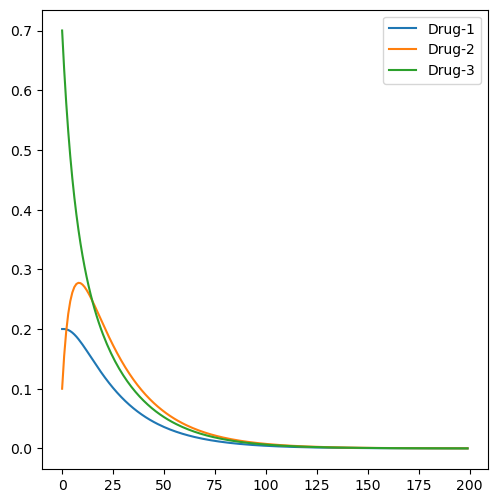

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
ax.plot(X[0, :])
ax.plot(X[1, :])
ax.plot(X[2, :])
plt.legend(["Drug-1", "Drug-2", "Drug-3"], loc ="upper right")

- Drug 2 shows an initial increase and then decrease in the concentration
- Approximately at 25th timestamp, drug 2 reaches it's peak concentration
- Drug 1 shows least change compared to others in the initial timestamps